In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"illa08","key":"d29977160f1461a968e9d8533c882e74"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 973MB/s]


In [4]:
!unzip "/content/fer2013.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/sad/Training_65242339.jpg  
  inflating: /content/dataset/train/sad/Training_65267116.jpg  
  inflating: /content/dataset/train/sad/Training_65275626.jpg  
  inflating: /content/dataset/train/sad/Training_6529266.jpg  
  inflating: /content/dataset/train/sad/Training_65329617.jpg  
  inflating: /content/dataset/train/sad/Training_65338712.jpg  
  inflating: /content/dataset/train/sad/Training_65338797.jpg  
  inflating: /content/dataset/train/sad/Training_65387162.jpg  
  inflating: /content/dataset/train/sad/Training_65404494.jpg  
  inflating: /content/dataset/train/sad/Training_65426218.jpg  
  inflating: /content/dataset/train/sad/Training_65430136.jpg  
  inflating: /content/dataset/train/sad/Training_65437377.jpg  
  inflating: /content/dataset/train/sad/Training_6545735.jpg  
  inflating: /content/dataset/train/sad/Training_65463385.jpg  
  inflating: /content/dataset/train/sad/Training_654739

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

#Displaying Images

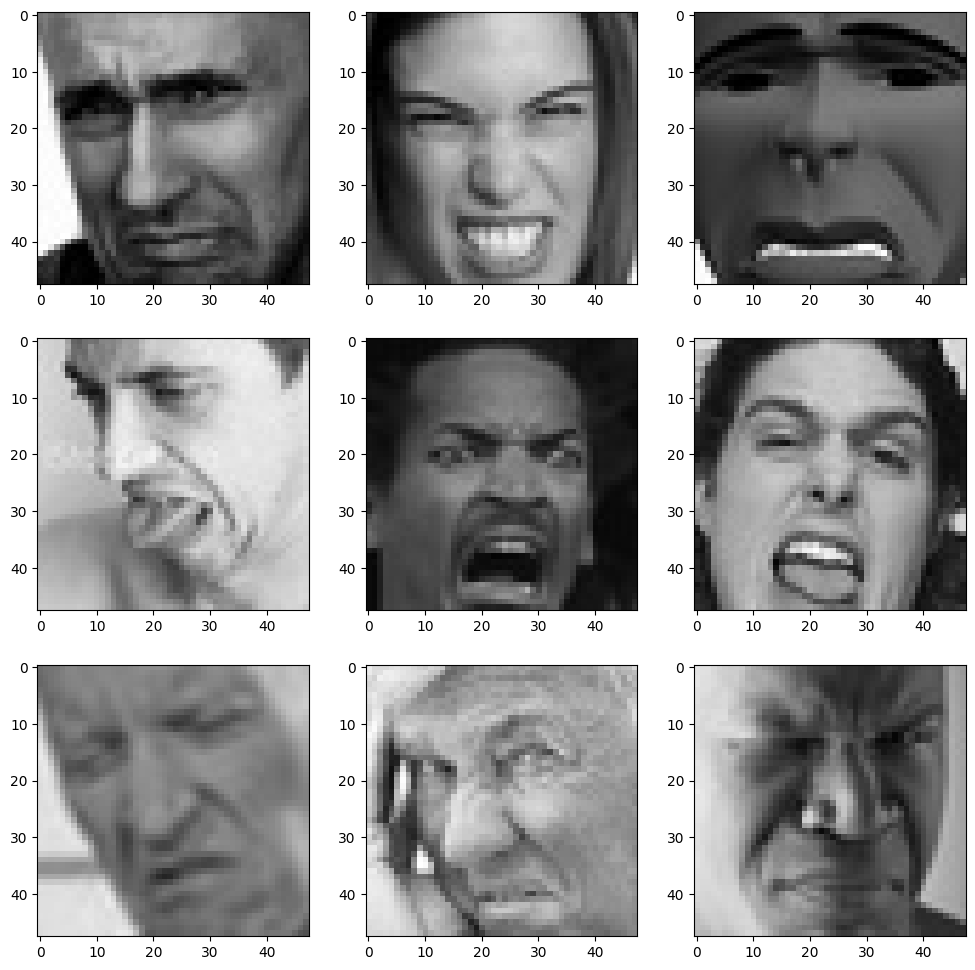

In [6]:
folder_path = "/content/dataset/"
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i])
    plt.imshow(img)
plt.show()

#Making Training and Validation data

In [7]:
batch_size  = 128
picture_size = 48

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              color_mode = "grayscale",
                                              target_size = (picture_size, picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              color_mode = "grayscale",
                                              target_size = (picture_size, picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#Model Building

In [8]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

#Fitting the Model with Training and Validation Data

In [14]:
import os
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Create a folder if it doesn't exist
os.makedirs("/content/output", exist_ok=True)

# Save model to this folder
checkpoint = ModelCheckpoint("/content/output/model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [15]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=40,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set),
    callbacks=[checkpoint],
    verbose=1
)


Epoch 1/40
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9414 - loss: 0.1670
Epoch 1: val_accuracy improved from -inf to 0.63207, saving model to /content/output/model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - accuracy: 0.9413 - loss: 0.1671 - val_accuracy: 0.6321 - val_loss: 1.7271
Epoch 2/40
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9380 - loss: 0.1716
Epoch 2: val_accuracy improved from 0.63207 to 0.63374, saving model to /content/output/model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.9380 - loss: 0.1716 - val_accuracy: 0.6337 - val_loss: 1.7395
Epoch 3/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9457 - loss: 0.1545
Epoch 3: val_accuracy did not improve from 0.63374
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9457 - loss: 0.1546 - val_accuracy: 0.6183 - val_loss: 1.7669
Epoch 4/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9414 - loss: 0.1576
Epoch 4: val_accuracy did not improve from 0.63374
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9414 - loss: 0.1576 - val_accuracy: 0.6276 - val_loss: 1.8063
Epoch 5/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9484 - loss: 0.1511
Epoch 5: val_accuracy improved from 0.63374 to 0.63918, saving model to /content/output/model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9483 - loss: 0.1512 - val_accuracy: 0.6392 - val_loss: 1.6489
Epoch 6/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9520 - loss: 0.1375
Epoch 6: val_accuracy did not improve from 0.63918
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9520 - loss: 0.1375 - val_accuracy: 0.6239 - val_loss: 1.8713
Epoch 7/40
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9530 - loss: 0.1352
Epoch 7: val_accuracy did not improve from 0.63918
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.9530 - loss: 0.1353 - val_accuracy: 0.6378 - val_loss: 1.7635
Epoch 8/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9513 - loss: 0.1412
Epoch 8: val_accuracy did not improve from 0.63918
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9513 - loss: 0.1412 - val_accuracy: 0.6166 - val_loss: 1.9454
Epoch 9/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9540 - loss: 0.1324
Epoch 9: val_accuracy d

225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9641 - loss: 0.1016 - val_accuracy: 0.6450 - val_loss: 1.8603
Epoch 24/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9664 - loss: 0.0961
Epoch 24: val_accuracy did not improve from 0.64503
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.9664 - loss: 0.0961 - val_accuracy: 0.6367 - val_loss: 1.8532
Epoch 25/40
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9631 - loss: 0.1066
Epoch 25: val_accuracy improved from 0.64503 to 0.64781, saving model to /content/output/model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9631 - loss: 0.1066 - val_accuracy: 0.6478 - val_loss: 1.8721
Epoch 26/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9674 - loss: 0.0954
Epoch 26: val_accuracy did not improve from 0.64781
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9674 - loss: 0.0954 - val_accuracy: 0.6395 - val_loss: 1.9499
Epoch 27/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9625 - loss: 0.1055
Epoch 27: val_accuracy did not improve from 0.64781
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9625 - loss: 0.1055 - val_accuracy: 0.6329 - val_loss: 1.8781
Epoch 28/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9664 - loss: 0.0936
Epoch 28: val_accuracy did not improve from 0.64781
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9664 - loss: 0.0936 - val_accuracy: 0.6429 - val_loss: 1.9126
Epoch 29/40
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9694 - loss: 0.0865
Epoch 29: val_ac

#Plotting Accuracy and Loss

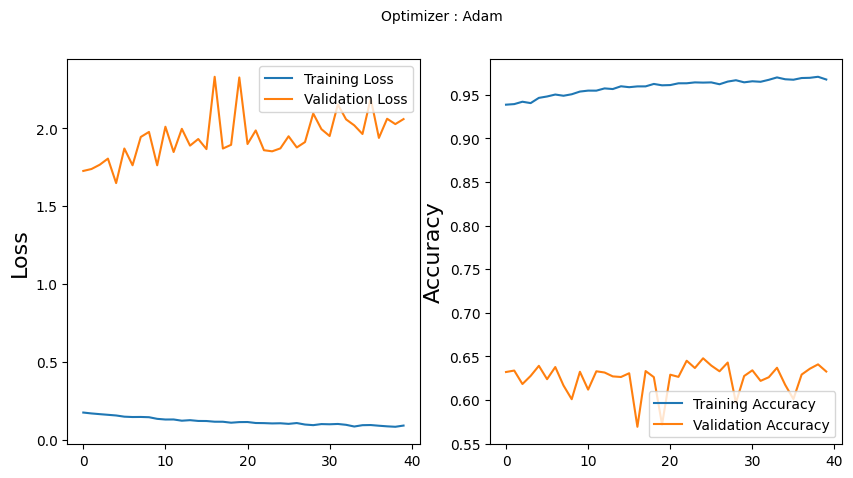

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()